In [29]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

In [30]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    # print(im_data)
    # print(type(im_data))
    # print(im_data.shape)


    height, width  = im_data.shape[:2]
    
    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    ax.axis('off')

    ax.imshow(im_data, cmap='gray')

    plt.show()
    pass

In [31]:
def show_img(txt, img):
    cv2.imshow(txt, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [32]:
def box_generate(path, ww=150):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    show_img("gray",gray)
    blur = cv2.GaussianBlur(gray, (7,7), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    show_img("thresh", thresh)
    kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3,13))
    dilate = cv2.dilate(thresh, kernal, iterations=1)
    show_img("dilate", dilate)
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])
    i=0
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        
        if w>ww:
            roi = img[y:y+h, x:x+w]
            # cv2.imshow(f"{i}", roi)
            # cv2.waitKey(0)
            # cv2.destroyAllWindows()
            print(i)
            cv2.imwrite(f"temp/bounding/bounding_roi_{i}.png", roi)
            display(f"temp/bounding/bounding_roi_{i}.png")
            i+=1
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.imwrite("temp/bounding_bbox.png", img)
    display("temp/bounding_bbox.png")
    return img

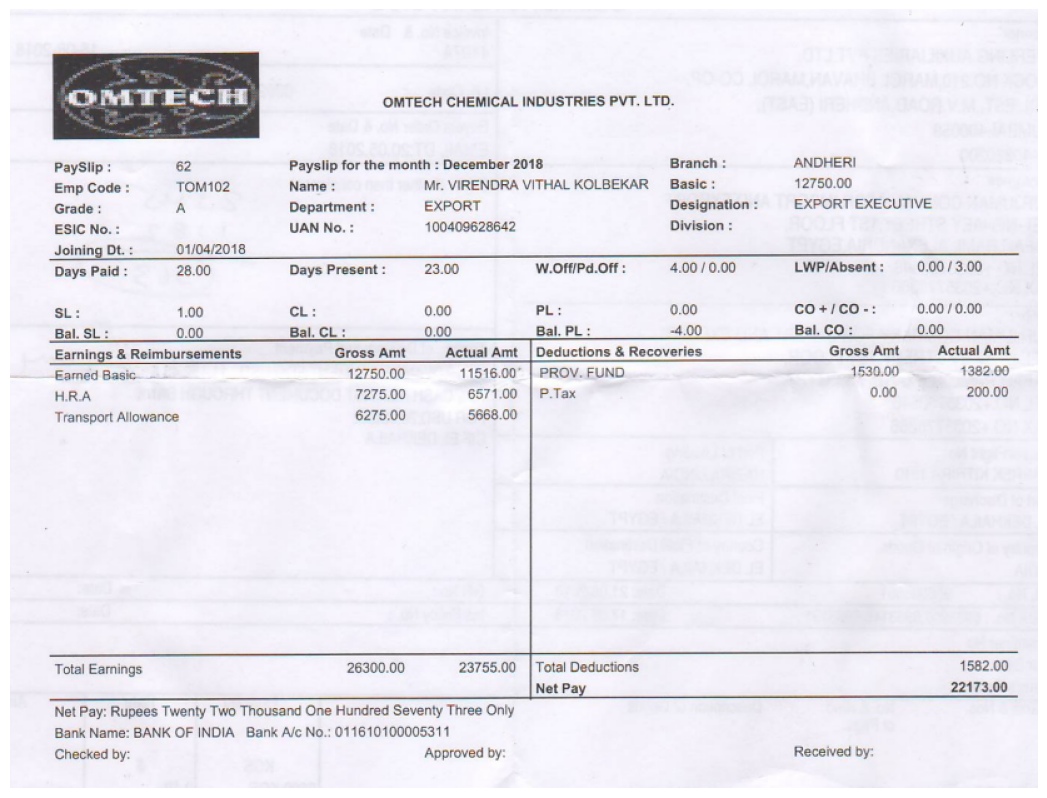

In [33]:
img = cv2.imread("Images/1.png")
# h, w, ch = img.shape
# img = cv2.resize(img, (w//2, h//2))
display("Images/1.png")

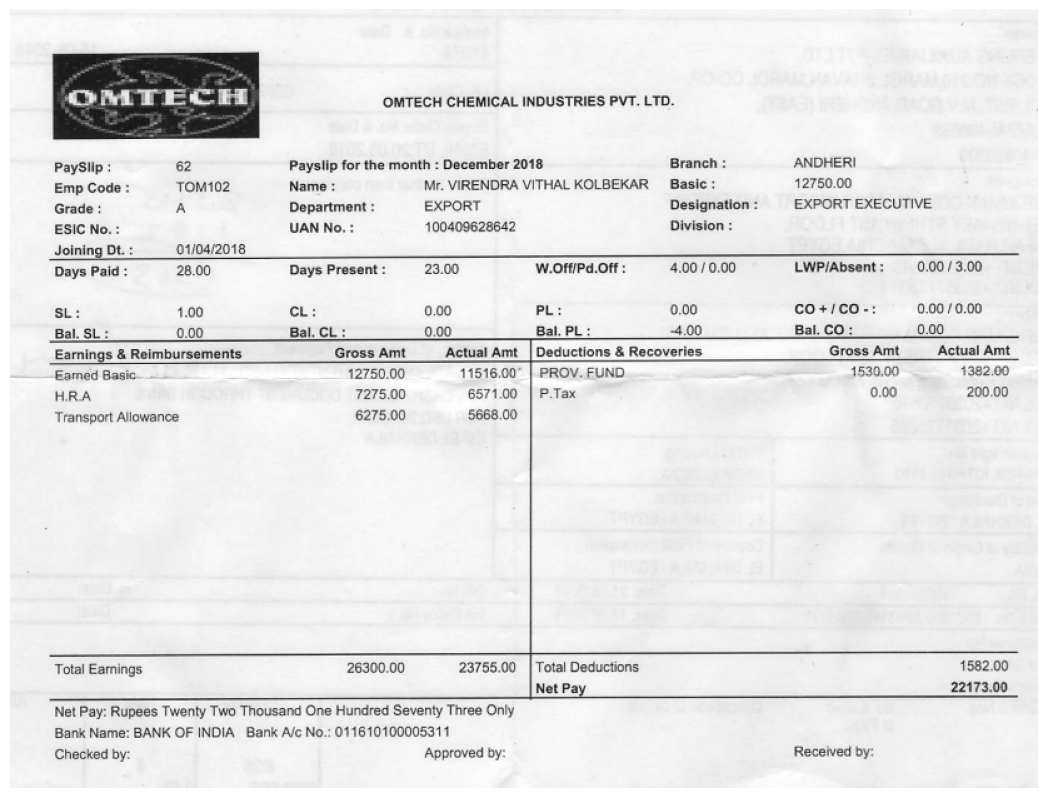

In [34]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite("temp/bounding_gray.png", gray)
display("temp/bounding_gray.png")

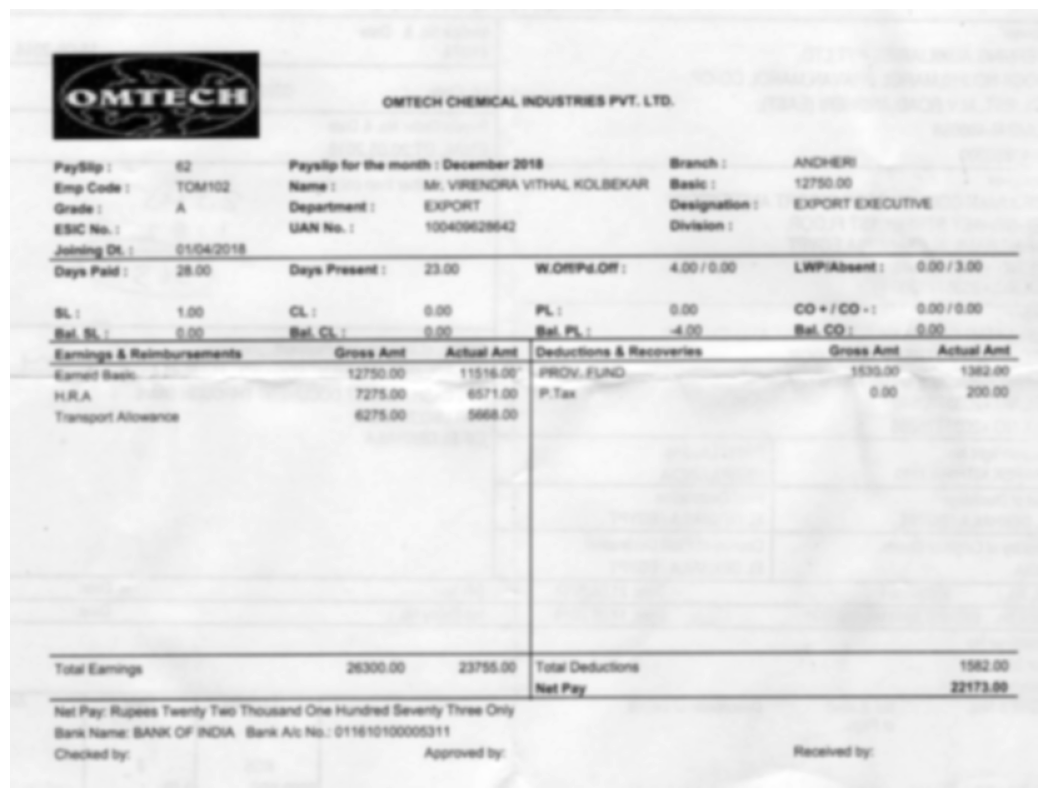

In [35]:
blur = cv2.GaussianBlur(gray, (7,7), 0)
cv2.imwrite("temp/bounding_blur.png", blur)
display("temp/bounding_blur.png")

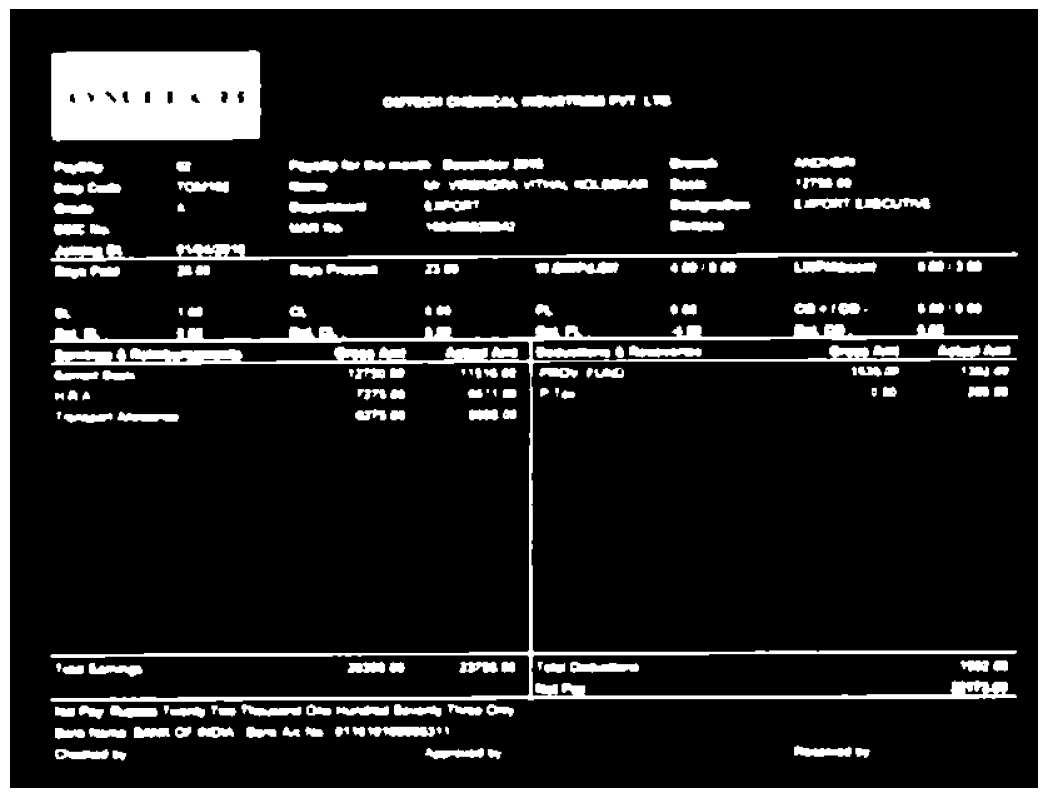

In [36]:
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2.imwrite("temp/bounding_thresh.png", thresh)
display("temp/bounding_thresh.png")

In [37]:
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3,13))
cv2.imwrite("temp/bounding_kernal.png", kernal)
display("temp/bounding_kernal.png")

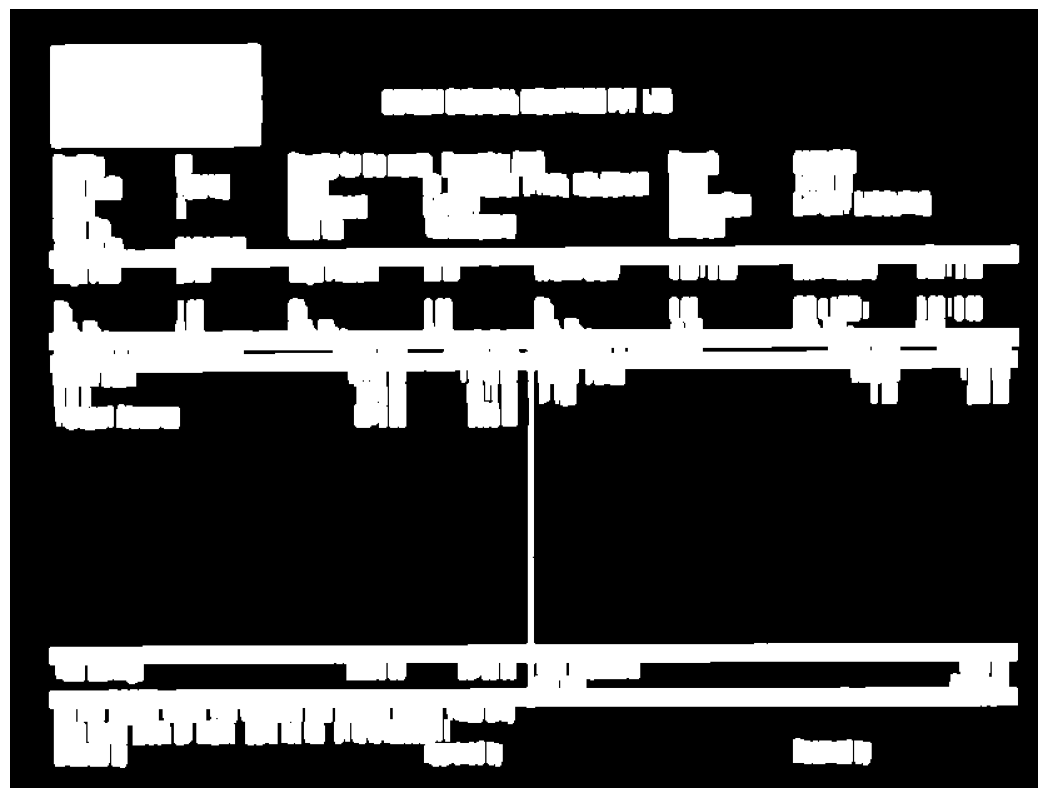

In [38]:
dilate = cv2.dilate(thresh, kernal, iterations=1)
cv2.imwrite("temp/bounding_dilate.png", dilate)
display("temp/bounding_dilate.png")

In [39]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [40]:
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

x: 31--> y: 229--> w: 776--> h: 378
0


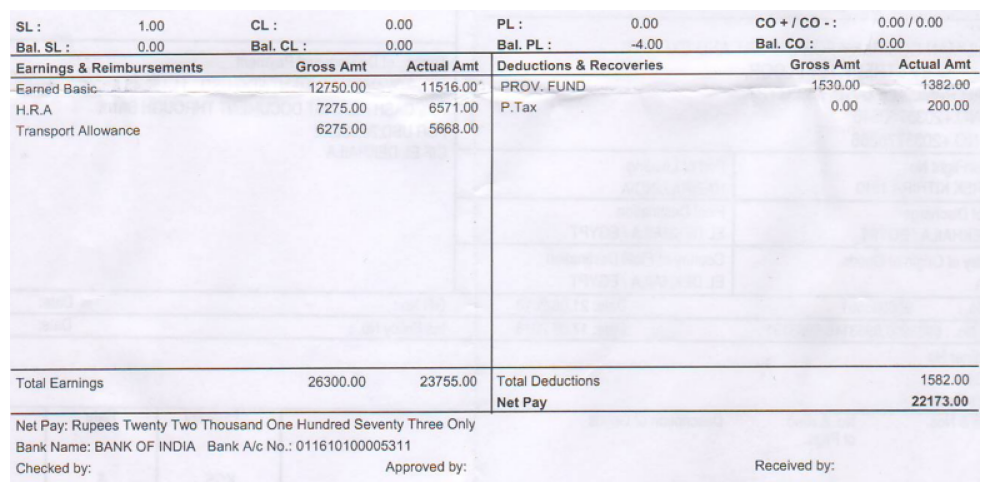

x: 31--> y: 116--> w: 776--> h: 106
1


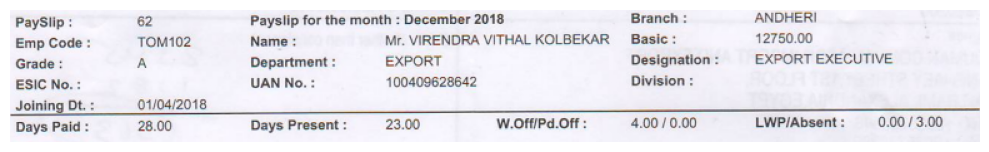

x: 32--> y: 27--> w: 170--> h: 85
2


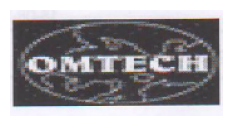

x: 85--> y: 316--> w: 51--> h: 20
x: 132--> y: 116--> w: 44--> h: 52
x: 222--> y: 114--> w: 64--> h: 71
x: 282--> y: 115--> w: 19--> h: 20
x: 297--> y: 64--> w: 50--> h: 21
x: 302--> y: 113--> w: 145--> h: 72
x: 348--> y: 63--> w: 59--> h: 22
x: 381--> y: 586--> w: 13--> h: 20
x: 408--> y: 63--> w: 69--> h: 22
x: 450--> y: 130--> w: 61--> h: 21
x: 478--> y: 63--> w: 23--> h: 21
x: 506--> y: 63--> w: 24--> h: 21
x: 526--> y: 113--> w: 67--> h: 71
x: 626--> y: 583--> w: 48--> h: 21
x: 626--> y: 112--> w: 51--> h: 54
x: 675--> y: 585--> w: 14--> h: 20
x: 675--> y: 145--> w: 62--> h: 21
x: 682--> y: 234--> w: 5--> h: 14
x: 750--> y: 231--> w: 3--> h: 15
x: 755--> y: 229--> w: 8--> h: 21
x: 764--> y: 229--> w: 14--> h: 21


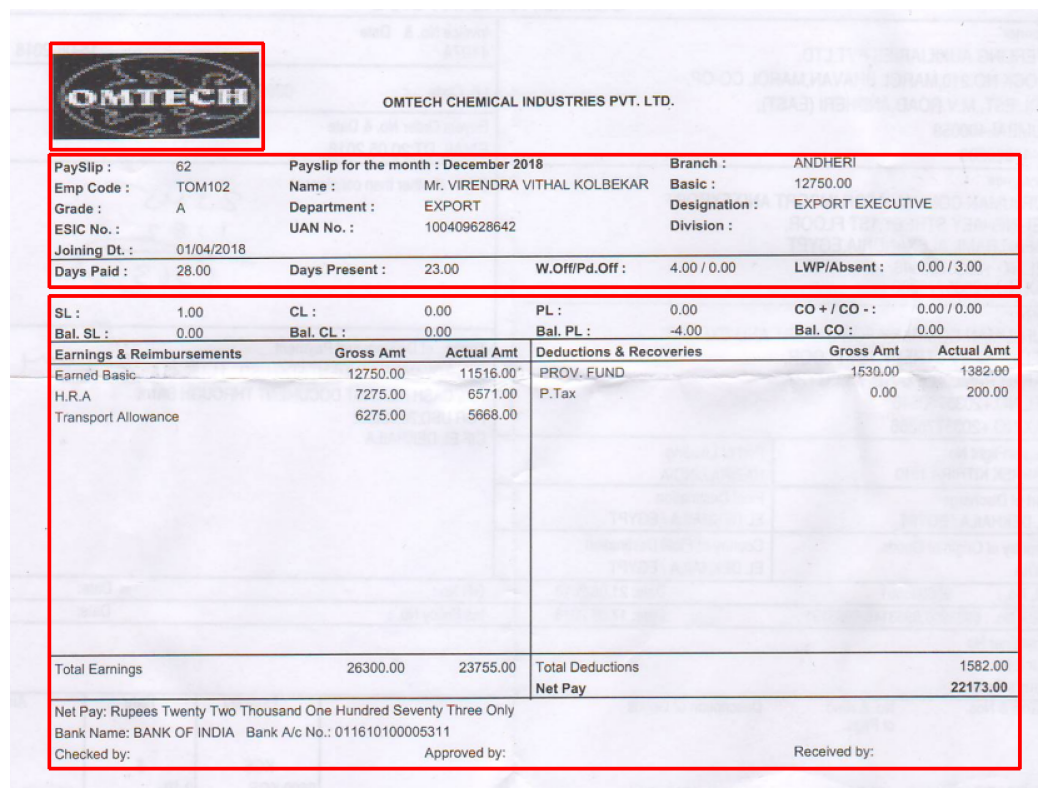

In [41]:
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])
i=0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    print(f"x: {x}--> y: {y}--> w: {w}--> h: {h}")
    
    if w>150:
        roi = img[y:y+h, x:x+w]
        # cv2.imshow(f"{i}", roi)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        print(i)
        cv2.imwrite(f"temp/bounding/bounding_roi_{i}.png", roi)
        display(f"temp/bounding/bounding_roi_{i}.png")
        i+=1
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
cv2.imwrite("temp/bounding_bbox.png", img)
display("temp/bounding_bbox.png")

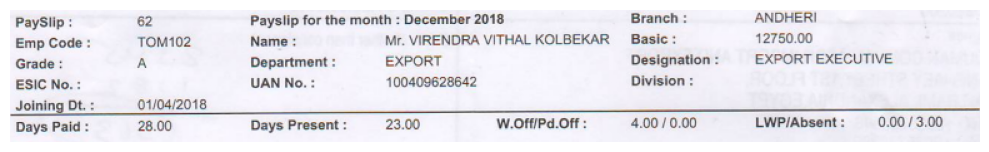

In [42]:
header = cv2.imread("temp/bounding/bounding_roi_1.png")
display("temp/bounding/bounding_roi_1.png")

In [43]:
def preprocess(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3,13))
    dilate = cv2.dilate(thresh, kernal, iterations=1)
    cv2.imshow("dilate", dilate)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return dilate

In [45]:
preprocess("temp/bounding_roi_1.png")

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [17]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [18]:
from img_2_txt import txt_from_img

# gray_img = cv2.cvtColor(header, cv2.COLOR_BGR2GRAY)

txt = txt_from_img(header)
txt = txt.split("\n")

while "" in txt:
    txt.remove("")

for line in txt:
    print("Line: ", line)
print(txt)

Line:  Payslip for the month : December 2018
Line:  Name : Mr. VIRENORA VITHAL
Line:  Department : EXPORT
Line:  UAN No. 100409628642
['Payslip for the month : December 2018', 'Name : Mr. VIRENORA VITHAL', 'Department : EXPORT', 'UAN No. 100409628642']


In [19]:
gray_img = cv2.cvtColor(header, cv2.COLOR_BGR2GRAY)
thresh, im_bw = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# ad_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
# cv2.imshow("Gray", gray_img)

cv2.imshow("BW", gray_img)

cv2.imshow("Thresh", im_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [20]:
txt2 = txt_from_img(im_bw)
txt2 = txt2.split("\n")
while "" in txt2:
    txt2.remove("")
for line in txt2:
    print(line)
print("-----------------------------------------")
for line in txt:
    print(line)



Paysiip for the month : Decamber 2018
Name Mr. VIRENDRA VITHAL
Department EXPORT
UAN No. : 100409628642
-----------------------------------------
Payslip for the month : December 2018
Name : Mr. VIRENORA VITHAL
Department : EXPORT
UAN No. 100409628642


In [21]:
from skimage.filters import threshold_local
# import skimage

def bw_scanner(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # T = 
    T = threshold_local(gray, 21, offset = 5, method = "gaussian")
    return (gray > T).astype("uint8") * 255

In [22]:
res = bw_scanner(header)
cv2.imshow("result",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
# txt3 = txt_from_img(res)
# txt3 = txt3.split("\n")

# while "" in txt3:
#     txt3.remove("")

# for line in txt:
#     print(line)

# print("-----------------------------------------------")

# for line in txt3:
#     print(line)


0


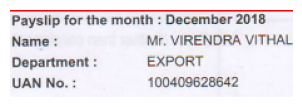

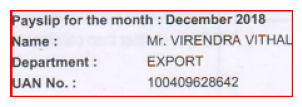

In [24]:
x = box_generate("temp/bounding/bounding_roi_1.png", ww=50)


In [25]:
import img_2_txt
txt4 = img_2_txt.txt_from_path("temp/bounding/bounding_roi_1.png")

txt4 = txt4.split("\n")
while "" in txt4:
    txt4.remove("")

for line in txt4:
    print(line)

Payslip for the month : December 2018
Name : Mr. VIRENORA VITHAL
Department : EXPORT
UAN No. 100409628642


In [26]:
import pytesseract
txt = pytesseract.image_to_boxes(gray)

In [27]:
# print(type(txt))
# print(txt.shape)